# Week5 - Logistic Regression Assignment

- Run the below cells.
- Complete all of the numbered questions. You may call any packages that we've used in class.  

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/employee-turnover-balanced.csv')
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


## Data Definitions
- `left_company`: Whether individual left the company or not. This is the target variable.
- `age`: Age of individual. 
- `frequency_of_travel`: How often person travels for work.  
- `department`: Department person works(worked).  
- `commuting_distance`: Distance person lives from office.  
- `education`: Highest education category.  
- `satisfaction_with_environment`: Satisfaction of environment, on lickert scale.  
- `gender`: Gender of individual.  
- `seniority_level`: Seniority level of individual.  
- `position`: Last position held at the company.  
- `satisfaction_with_job`: Satisfaction of their job, on lickert scale.  
- `married_or_single`: Marital status of person.  
- `last_raise_pct`: Percent increase their last raise represented.  
- `last_performance_rating`: Most recent annual performance rating, on lickert scale.  
- `total_years_working`: Number of years the individual has spent working in their career.  
- `years_at_company`: Number of years the individual has been at the company, regardless of position.  
- `years_in_current_job`: Number of years the individual has been in their current position.  
- `years_since_last_promotion`: Years since the person had their last promotion.  
- `years_with_current_supervisor`: Years the person has had their current supervisor.

# Question 1
- What is the distribution of the target (`left_company`)?  
- Do you have any concerns on class imbalances?

In [6]:
# insert code
target_distribution = df['left_company'].value_counts()
target_distribution

Yes    500
No     500
Name: left_company, dtype: int64

In [22]:
X = (df['left_company'] == 'No').astype(int)

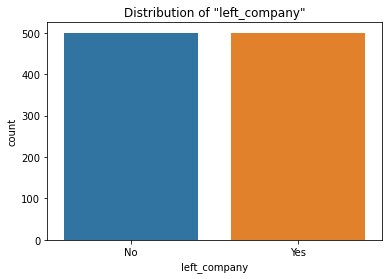

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='left_company')
plt.title('Distribution of "left_company"')
plt.show()

We don't have any class imbalance

Insert comments here

# Question 2
- Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.  
- Explain your choices.

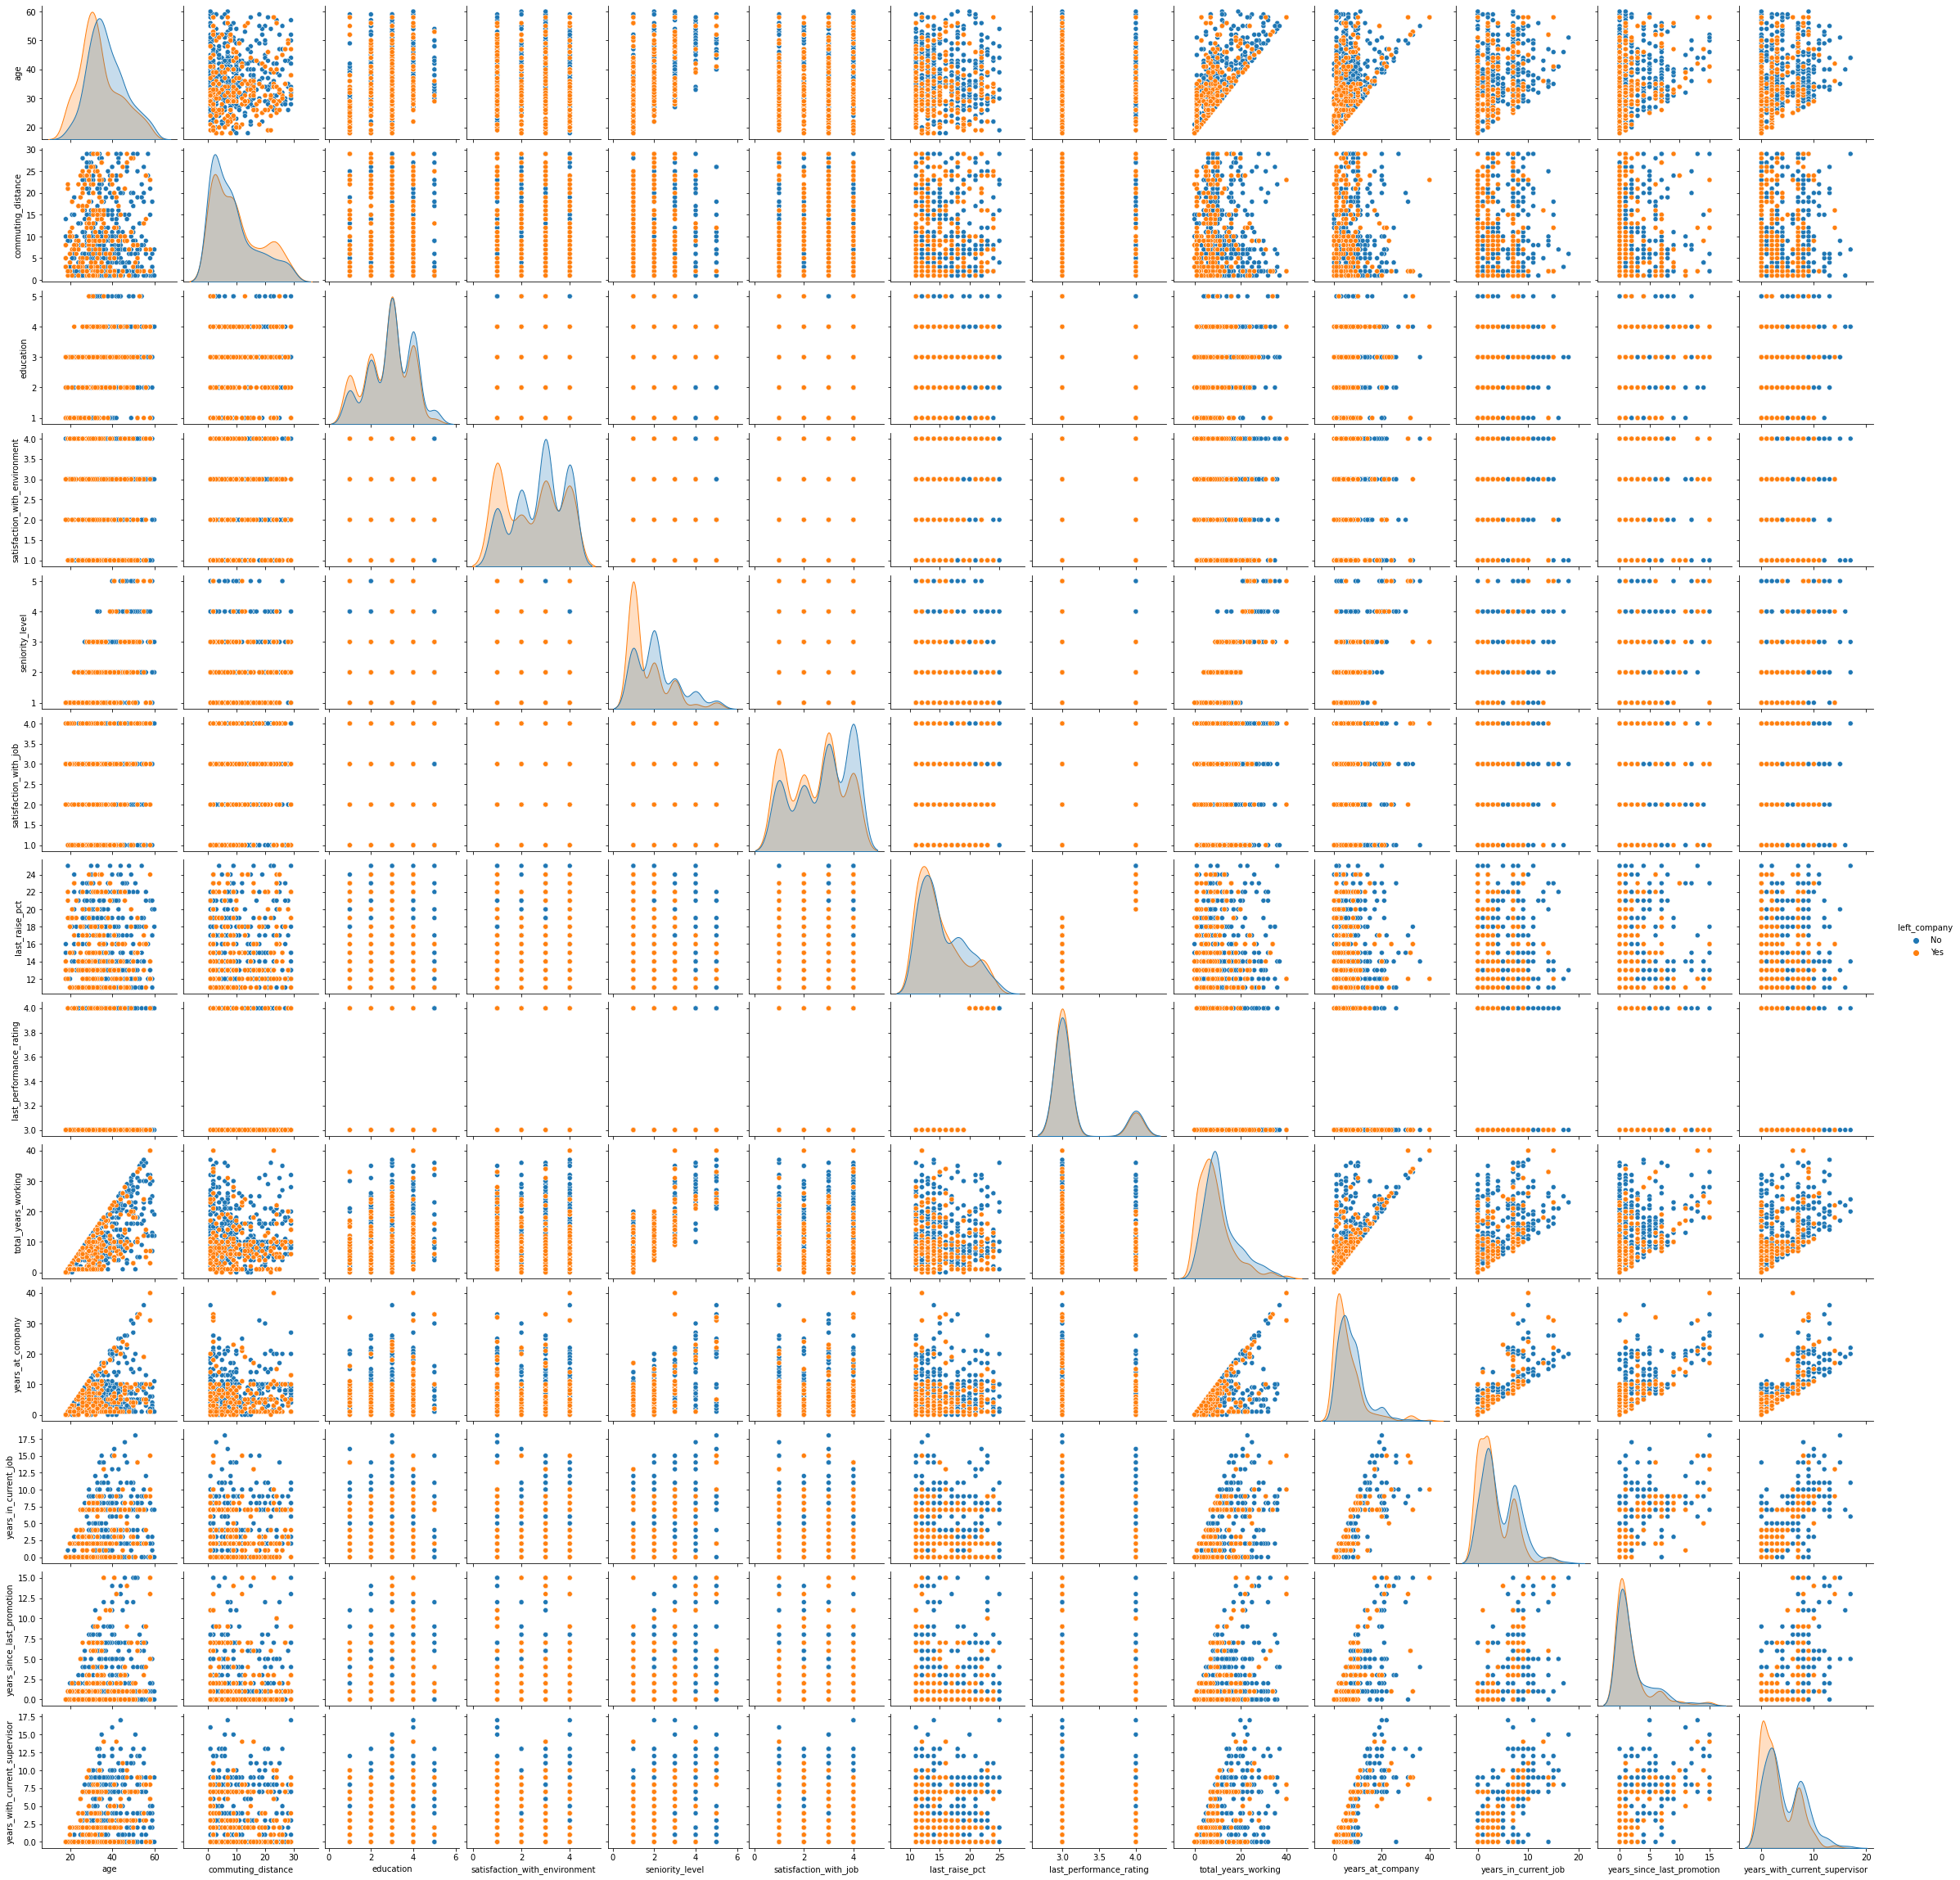

In [8]:
import seaborn as sns
sns.pairplot(df, hue='left_company')

In [9]:
df.dtypes

left_company                     object
age                               int64
frequency_of_travel              object
department                       object
commuting_distance                int64
education                         int64
satisfaction_with_environment     int64
gender                           object
seniority_level                   int64
position                         object
satisfaction_with_job             int64
married_or_single                object
last_raise_pct                    int64
last_performance_rating           int64
total_years_working               int64
years_at_company                  int64
years_in_current_job              int64
years_since_last_promotion        int64
years_with_current_supervisor     int64
dtype: object

In [25]:
X = df.iloc[:, 0]# target 
Y = df.iloc[:, 1:]
print(X)
print(Y)

0       No
1       No
2       No
3       No
4       No
      ... 
995    Yes
996    Yes
997    Yes
998    Yes
999    Yes
Name: left_company, Length: 1000, dtype: object
     age frequency_of_travel              department  commuting_distance  \
0     37       Travel_Rarely                   Sales                  16   
1     39       Travel_Rarely  Research & Development                   3   
2     52   Travel_Frequently  Research & Development                  25   
3     50          Non-Travel                   Sales                   1   
4     44       Travel_Rarely  Research & Development                   4   
..   ...                 ...                     ...                 ...   
995   39       Travel_Rarely                   Sales                   3   
996   26       Travel_Rarely                   Sales                   4   
997   18   Travel_Frequently                   Sales                   5   
998   28       Travel_Rarely  Research & Development                   

In [20]:
categorical_data = Y.select_dtypes(include=['object'])# all categorical columns
numeric_data = Y.select_dtypes(exclude=['object']) # all Numeric Columns
print(categorical_data.columns)# categorical column names 
print(numeric_data.columns)# Numerical data column names

Index(['frequency_of_travel', 'department', 'gender', 'position',
       'married_or_single'],
      dtype='object')
Index(['age', 'commuting_distance', 'education',
       'satisfaction_with_environment', 'seniority_level',
       'satisfaction_with_job', 'last_raise_pct', 'last_performance_rating',
       'total_years_working', 'years_at_company', 'years_in_current_job',
       'years_since_last_promotion', 'years_with_current_supervisor'],
      dtype='object')


In [26]:
numerical_vars = ['age', 'commuting_distance', 'education','satisfaction_with_environment', 'seniority_level','satisfaction_with_job', 'last_raise_pct', 'last_performance_rating','total_years_working', 'years_at_company', 'years_in_current_job','years_since_last_promotion', 'years_with_current_supervisor']
categorical_Vars = ['frequency_of_travel', 'department', 'gender', 'position','married_or_single']

Insert comments here

# Question 3
- Determine if any numerical variables risk multicolinearity.  
- Remove those variables (if any) from your numerical_vars list.  
- Why did you or did not remove any?

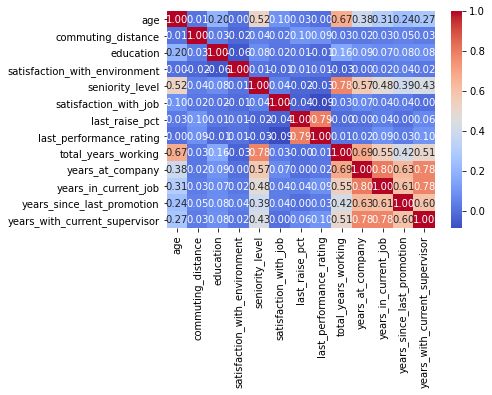

[('seniority_level', 'total_years_working'), ('last_raise_pct', 'last_performance_rating'), ('years_at_company', 'years_in_current_job'), ('years_at_company', 'years_with_current_supervisor'), ('years_in_current_job', 'years_with_current_supervisor')]


['seniority_level',
 'last_raise_pct',
 'years_at_company',
 'years_with_current_supervisor',
 'years_in_current_job']

In [28]:
correlation_matrix = df[numerical_vars].corr() # created a correlation matrix to check the relation between variables.
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")# ploting the matrix
plt.show()
threshold = 0.7 # given a radom threshold value of 0.7
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))
# Create a list of variables to drop
print(highly_correlated_pairs)# all the high correlated pairs
variables_ = []# created a empty list to append the numeric column names which are need to be droped
for var1, var2 in highly_correlated_pairs:
    if var1 in variables_:
        variables_.append(var2)
    else:
        variables_.append(var1)


variables_# prints the variables which need to be droped


In [29]:
numeric_data1 = numeric_data.drop(columns=variables_)
numeric_data1

,age,commuting_distance,education,satisfaction_with_environment,satisfaction_with_job,last_performance_rating,total_years_working,years_since_last_promotion
0,37,16,4,4,3,3,9,0
1,39,3,2,3,3,3,11,0
2,52,25,4,3,4,4,31,0
3,50,1,3,4,3,3,19,0
4,44,4,3,4,2,3,10,2
...,...,...,...,...,...,...,...,...
995,39,3,2,4,3,3,12,0
996,26,4,4,4,4,3,8,7
997,18,5,3,2,2,3,0,0
998,28,2,4,1,4,3,5,2


By using correaltion matrix we can tell multicolinearity of a variable  i tried using Variance Inflation Factor (VIF) but correlation matrix gave me good insight compared to VIF

# Question 4
- Split the data into training and test sets.  
- Use 20% of the data for test and a random state of 124.  

In [31]:
combined_data = pd.concat([numeric_data1, categorical_data], axis=1)# combining both numric and categorical data 
combined_data

,age,commuting_distance,education,satisfaction_with_environment,satisfaction_with_job,last_performance_rating,total_years_working,years_since_last_promotion,frequency_of_travel,department,gender,position,married_or_single
0,37,16,4,4,3,3,9,0,Travel_Rarely,Sales,Male,Sales Executive,Divorced
1,39,3,2,3,3,3,11,0,Travel_Rarely,Research & Development,Male,Laboratory Technician,Divorced
2,52,25,4,3,4,4,31,0,Travel_Frequently,Research & Development,Female,Manufacturing Director,Married
3,50,1,3,4,3,3,19,0,Non-Travel,Sales,Female,Sales Executive,Married
4,44,4,3,4,2,3,10,2,Travel_Rarely,Research & Development,Male,Healthcare Representative,Single
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,39,3,2,4,3,3,12,0,Travel_Rarely,Sales,Female,Sales Executive,Married
996,26,4,4,4,4,3,8,7,Travel_Rarely,Sales,Male,Sales Executive,Single
997,18,5,3,2,2,3,0,0,Travel_Frequently,Sales,Male,Sales Representative,Single
998,28,2,4,1,4,3,5,2,Travel_Rarely,Research & Development,Male,Research Scientist,Married


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(combined_data, X, test_size=0.2, random_state=122)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(800, 13)
(200, 13)
(800,)
(200,)


# Question 5
- Create a pipeline to process the numerical data.  
- Create a pipeline to process the categorical data.  

Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

In [36]:
numrical_column_names = numeric_data1.columns.tolist()
numrical_column_names# the numrical data after droping the columns containg multicolinearity

['age',
 'commuting_distance',
 'education',
 'satisfaction_with_environment',
 'satisfaction_with_job',
 'last_performance_rating',
 'total_years_working',
 'years_since_last_promotion']

In [38]:
# i have chosen standard scalar for normalizing the data 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())  # Standardize numerical features
])
X_train_numerical_data = numerical_pipeline.fit_transform(X_train[numrical_column_names])
data_ = pd.DataFrame(X_train_numerical_data)
print(data_)
print(data_.shape)

            0         1         2         3         4         5         6  \
0    1.741816 -0.940291 -1.846333 -1.418574  1.221861 -0.438464  2.879700   
1   -1.681375 -0.452383  0.127036  1.262196  1.221861 -0.438464 -1.173539   
2   -0.611628  1.987160  1.113720  0.368606 -1.434359 -0.438464 -0.160230   
3   -1.467425 -0.330406 -1.846333  1.262196 -0.548952  2.280691 -1.173539   
4   -0.183729 -0.330406  1.113720 -1.418574  1.221861 -0.438464 -1.173539   
..        ...       ...       ...       ...       ...       ...       ...   
795  0.244170  0.767389  0.127036 -0.524984 -0.548952 -0.438464 -0.286893   
796 -0.718603  1.621229 -1.846333  1.262196 -1.434359 -0.438464  0.093098   
797  0.030220  0.157503  1.113720 -0.524984  1.221861 -0.438464 -0.286893   
798  2.169714  1.743206 -0.859648 -1.418574  1.221861 -0.438464 -0.666884   
799  0.137195 -0.452383  1.113720  0.368606  1.221861 -0.438464 -0.413557   

            7  
0    1.276041  
1   -0.323509  
2   -0.643419  
3   -0.6434

In [40]:
unique_value_counts = categorical_data.nunique()
unique_value_counts

frequency_of_travel    3
department             3
gender                 2
position               9
married_or_single      3
dtype: int64

so total unique values of all columns is equal to 20 so we need to get 20 columns after doing one hot encoder.

In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
pipeline_Categorical_data = Pipeline([# using simple imputer for filling missing values with most_frequent
    ('encoder', OneHotEncoder(handle_unknown='ignore')),#using one_hot_encoder for converting categorical data into numeric data.
])
X_train_Catgorical_data = pipeline_Categorical_data.fit_transform(X_train[categorical_Vars])
data_ = pd.DataFrame(X_train_Catgorical_data.toarray())
print(data_)
print(data_.shape)

      0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0    0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
1    0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2    0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
4    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
795  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
796  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
797  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
798  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   
799  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   

      14   15   16   17   18   19  
0    0.0  0.0  0.0  0.0  1.0  0.0  
1  

# Question 6
- Create a pipeline that combines the pre-processing and implements a logistic regression model.  
- Print the accuracy on the training set and the test set.
- Do you have any concerns of overfitting based on the differences between the two accuracy scores?

In [42]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline,numrical_column_names),#numerical data
        ('cat', pipeline_Categorical_data,categorical_Vars)#categorical data
    ])
processed_data = preprocessor.fit_transform(X_train)
processed_data_array = pd.DataFrame(processed_data)
processed_data_array

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.741816,-0.940291,-1.846333,-1.418574,1.221861,-0.438464,2.879700,1.276041,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.681375,-0.452383,0.127036,1.262196,1.221861,-0.438464,-1.173539,-0.323509,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.611628,1.987160,1.113720,0.368606,-1.434359,-0.438464,-0.160230,-0.643419,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-1.467425,-0.330406,-1.846333,1.262196,-0.548952,2.280691,-1.173539,-0.643419,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-0.183729,-0.330406,1.113720,-1.418574,1.221861,-0.438464,-1.173539,-0.643419,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.244170,0.767389,0.127036,-0.524984,-0.548952,-0.438464,-0.286893,-0.323509,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
796,-0.718603,1.621229,-1.846333,1.262196,-1.434359,-0.438464,0.093098,0.316311,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
797,0.030220,0.157503,1.113720,-0.524984,1.221861,-0.438464,-0.286893,-0.643419,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
798,2.169714,1.743206,-0.859648,-1.418574,1.221861,-0.438464,-0.666884,-0.323509,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [43]:
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([('preprocessor', preprocessor),('m',LogisticRegression())])# added a logisic regression model to a pipeline
pipeline.fit(X_train,Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'commuting_distance',
                                                   'education',
                                                   'satisfaction_with_environment',
                                                   'satisfaction_with_job',
                                                   'last_performance_rating',
                                                   'total_years_working',
                                                   'years_since_last_promotion']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneH

In [46]:
from sklearn.metrics import accuracy_score
y_predictions_on_testing_data = pipeline.predict(X_test)
y_predictions_on_traing_data = pipeline.predict(X_train)
Acuracy_testing_data =  accuracy_score(Y_test,y_predictions_on_testing_data)
Acuracy_training_data =  accuracy_score(Y_train,y_predictions_on_traing_data)
print("Accuracy of testing data",Acuracy_testing_data)
print("Accuracy of training data",Acuracy_training_data)

Accuracy of testing data 0.665
Accuracy of training data 0.73


Less than 10 percent difference in accuracy may raise some concerns. It suggests that the model is fitting the training data relatively well, but it may still generalize reasonably to the test data

# Question 7
What would you recommend as potential next steps for continuing to develop and evaluate a model?

Collecting more data:
    Increasing the size of  dataset can help mitigate overfitting.
 
Feature Selection:
Carefully select and reduce the number of features used in your model.

Hyperparameter Tuning:
Adjust hyperparameters, such as learning rate, model complexity, and regularization strength, to find the right balance between underfitting and overfitting.